In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
len(X_train)

60000

In [54]:
len(X_test)

10000

In [55]:
X_train[0].shape

(28, 28)

In [56]:
X_train[0] #weight

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

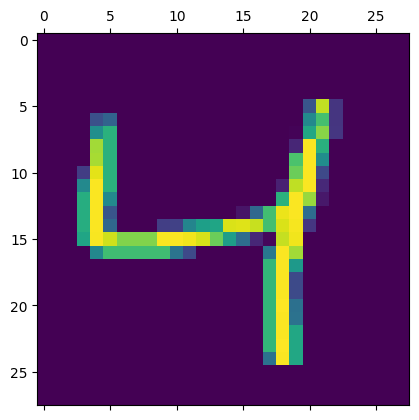

In [57]:
plt.matshow(X_train[2])

In [58]:
y_train[2]

4

### Flattening to get 1D array from 2D Array (using `reshape`)


In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_train_flat = X_train.reshape(len(X_train), 28*28) # this is actually (60000, 28*28)

In [61]:
X_train_flat.shape

(60000, 784)

In [62]:
X_test.shape

(10000, 28, 28)

In [63]:
X_train = X_train / 255
X_test = X_test /255

In [64]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

In [65]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Creating a Simple Neural Network

In [66]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5922 - accuracy: 0.8401
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1002 - accuracy: 0.8775
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7977 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6372 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4460 - accuracy: 0.8873


### Evaluating Accuracy

In [67]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5959 - accuracy: 0.5115


[1.595898985862732, 0.5115000009536743]

In [68]:
y_predicted = model.predict(X_test_flat)
y_predicted[1]

313/313 [==============================] - 0s 993us/step


array([0.46839008, 0.6197887 , 0.8588533 , 0.6010867 , 0.1295605 ,
       0.8572183 , 0.6488561 , 0.05897742, 0.45470634, 0.16469778],
      dtype=float32)

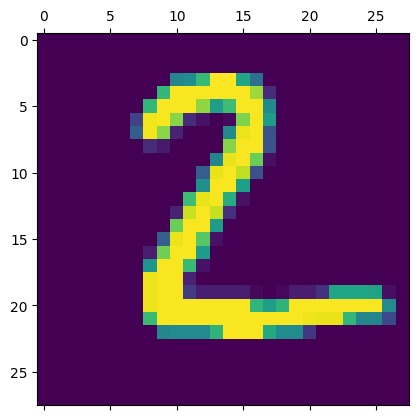

In [69]:
plt.matshow(X_test[1])

In [70]:
np.argmax(y_predicted[1])

2

In [74]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 5, 4]

In [71]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [75]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[309,   0,   7,   0,   1, 651,   2,  10,   0,   0],
       [  0, 861,   1,   0,   0, 273,   0,   0,   0,   0],
       [  0,  10, 744,   0,  14, 250,   1,  12,   0,   1],
       [  0,   0,  18,  39,   1, 933,   0,  19,   0,   0],
       [  0,   0,   0,   0, 819, 154,   1,   6,   0,   2],
       [  0,   0,   0,   0,   0, 891,   1,   0,   0,   0],
       [  2,   0,  10,   0,  13, 521, 409,   3,   0,   0],
       [  0,   4,  10,   0,   5, 145,   0, 859,   0,   5],
       [  1,   7,   2,   0,   8, 936,   2,   5,   0,  13],
       [  0,   0,   0,   0, 130, 627,   1,  67,   0, 184]])>

Text(45.722222222222214, 0.5, 'Truth')

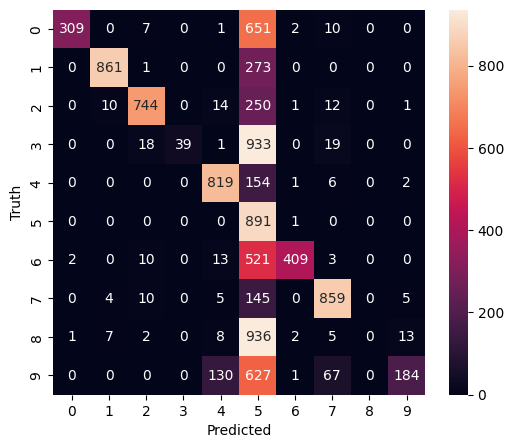

In [77]:
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding a hidden layer

In [78]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2445 - accuracy: 0.8498
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3720 - accuracy: 0.9090
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.9254
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2542 - accuracy: 0.9351
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2358 - accuracy: 0.9416


In [79]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3182 - accuracy: 0.0974


[2.3182125091552734, 0.09740000218153]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

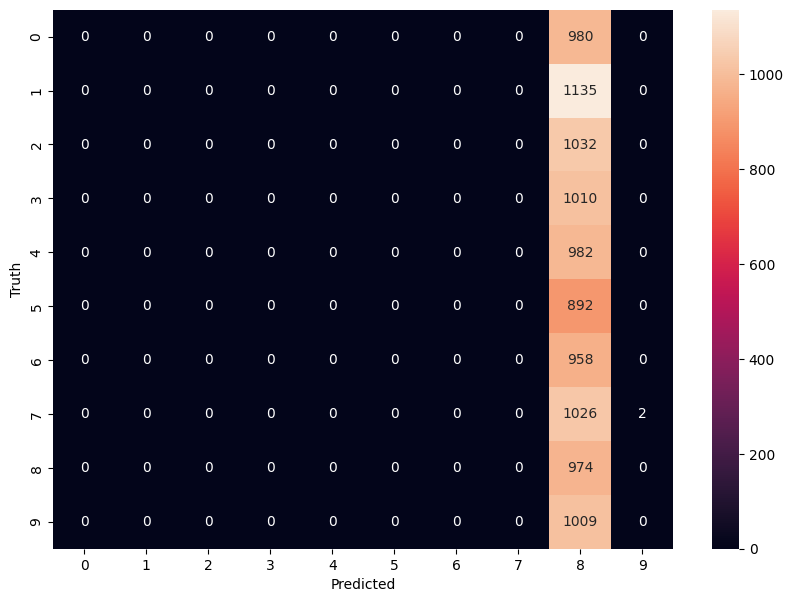

In [80]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1200 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0654 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0324 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.018

In [82]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9771


[0.08018554747104645, 0.9771000146865845]